In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

## Working with Open Weather API

For this part, you will be working on data from https://openweathermap.org/

#### How to use API key in API call

To get access to weather API you need an API key whatever account you chose from Free to Enterprise.

Activation of an API key for Free and Startup plans takes 10 minutes. For other tariff plans it is 10 to 60 minutes.

We keep right to not to process API requests without API key.

**API call:**

    http://api.openweathermap.org/data/2.5/forecast/city?id=524901&APPID={APIKEY}

**Parameters:**

    APPID {APIKEY} is your unique API key 
    Example of API call:

    api.openweathermap.org/data/2.5/forecast/city?id=524901&APPID=1111111111 

#### How to get accurate API response

1. Do not send requests more than 1 time per 10 minutes from one device/one API key. Normally the weather is not changing so frequently.
2. Use the name of the server as api.openweathermap.org. Please never use the IP address of the server.
3. Call API by city ID instead of city name, city coordinates or zip code. In this case you get precise respond exactly for your city.
4. Free account has limitation of capacity and data availability. If you do not get respond from server do not try to repeat your request immediately, but only after 10 min. Also we recommend to store your previous request data.




In [2]:
import requests
import pandas as pd
import json

APPID = '76a800cf3df38b59af1e951b9fcdbce6'

def kToC(k):
    return k-273.15

In [43]:
def get_data(rq_str): # return df
    r = requests.get(rq_str)
    data = r.json()
    df = pd.DataFrame(data['list'])
    df.index = pd.to_datetime(df['dt'], unit='s') # index frame with dt
    return df

def add_cols(df):
    
    df['temp'] = df['main'].apply(lambda x: kToC(x['temp']))
    df['temp_min'] = df['main'].apply(lambda x: kToC(x['temp_min']))
    df['temp_max'] = df['main'].apply(lambda x: kToC(x['temp_max']))
    df['humidity'] = df['main'].apply(lambda x: kToC(x['humidity']))

def plot_each(df, city):
    ax = df['temp'].plot(figsize=(10,5),style='o-')
    # Since the fructuation is too small to notice, I purposedly add +1/-1 to the max/max to demo the fill graph
    ax.fill_between(df.index, df['temp_min']-1,df['temp_max']+1,alpha=0.7)
    ax.set_ylabel('Temperature (C)')

    ax2 = df['humidity'].plot(style='o-',secondary_y=True)
    ax2.set_ylabel('Humidity')

    ax.legend(loc=4)
    ax2.legend(loc=3)
    ax.set_title(city)

    ax.get_figure().savefig('city.png')

In [44]:
def forecast(city):
    rq_str= 'http://api.openweathermap.org/data/2.5/forecast?q=' + city + '&APPID='+APPID
    df = get_data(rq_str)
    add_cols(df)
    plot_each(df, city)

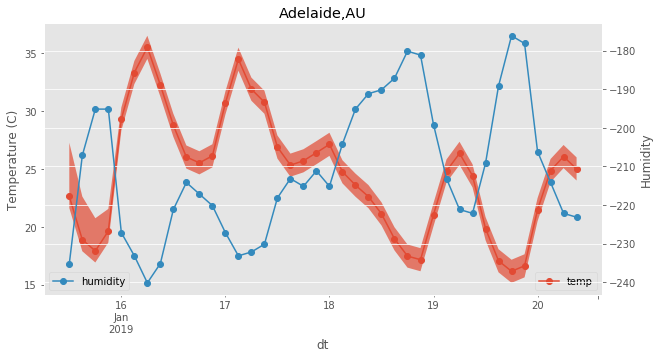

In [45]:
forecast("Adelaide,AU")

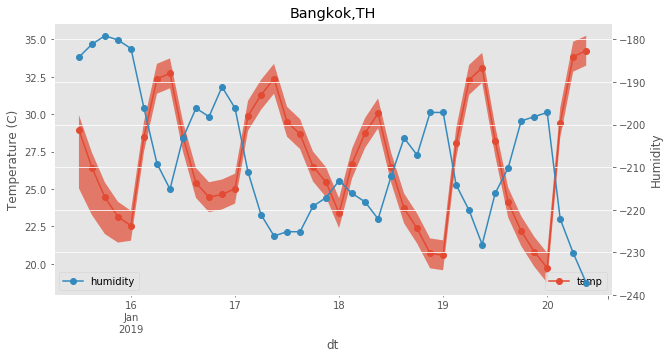

In [46]:
forecast("Bangkok,TH")

In [79]:
def plot_each(df, city):
    ax = df['temp'].plot(figsize=(10,5),style='-')
    ax.fill_between(df.index, df['temp_min']-1,df['temp_max']+1,alpha=0.7)
    ax.set_ylabel('Temperature (C)')
    ax.legend(['Madrid','Seville','Barcelona','Ronda'], loc=4) # order checked
    ax.set_title('Hotness the bull & the matadora might feel in each city')
    ax.get_figure().savefig('city.png')

def forecast(city):
    rq_str= 'http://api.openweathermap.org/data/2.5/forecast?q=' + city + '&APPID='+APPID
    df = get_data(rq_str)
    add_cols(df)
    plot_each(df, city)

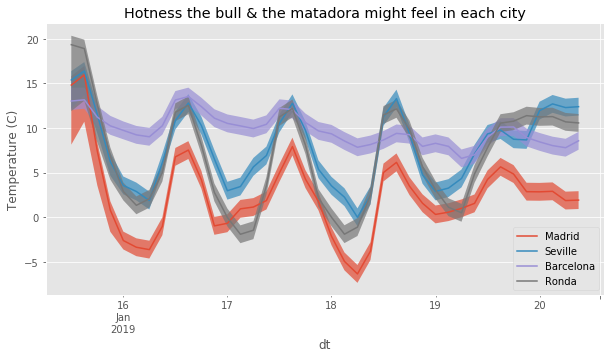

In [80]:
forecast("Madrid,ES")
forecast("Seville,ES")
forecast("Barcelona,ES") # ban lift in 2016 :(
forecast("Ronda,ES")